### MNIST Digits 
  - Classification Using SVM

### Data Understanding using Meta Data and Cleaning 

In [9]:
import numpy as np
import pandas as pd


In [75]:
# Importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
# Rescaling the features
from sklearn.preprocessing import scale

In [81]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [103]:
# SVM related libraries
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [96]:
import gc

#### Generic Functions

In [50]:
def get_nulls_report(df,apply_style="Y"):
    if apply_style=="Y":
        cm = sns.light_palette("orange", as_cmap=True)
        return pd.DataFrame([df.isnull().sum(),round(100*(df.isnull().sum()/len(df.index)), 2)]).T.rename(columns={0:'Total Nulls',1:'Nulls Percentage'}).\
sort_values(by='Nulls Percentage',ascending=False).style.background_gradient(cmap=cm)
    else:
        return pd.DataFrame([df.isnull().sum(),round(100*(df.isnull().sum()/len(df.index)), 2)]).T.rename(columns={0:'Total Nulls',1:'Nulls Percentage'}).\
sort_values(by='Nulls Percentage',ascending=False)

In [2]:
# Reading the csv and start analysing the meta data 
digits_df = pd.read_csv("train.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
digits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
# Inspect the Dataframe
digits_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Inspect the shape 
digits_df.shape

(42000, 785)

In [52]:
digits_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


##### Since the dataframe contains the 'pixel values' of each digit (image) comprise the features, and the actual number between 0-9 is the label. 

In [53]:
# For example we are taking an example of the 7 and 4
seven = digits_df.iloc[6, 1:]

In [73]:
eight = digits_df.iloc[10, 1:]

In [66]:
seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap='Wistia')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

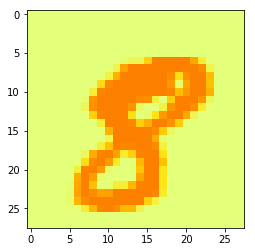

In [74]:
eight = eight.values.reshape(28, 28)
plt.imshow(eight, cmap='Wistia')
plt.show()

In [68]:
# If we visualize the actual array ,it comes like below
print(seven[5:-5, 5:-5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  82 152  71  51  51  21  41  51  51  51  51 113 193 152  30   0   0]
 [  0 122 253 252 253 252 223 243 253 252 253 252 253 252 233  30   0   0]
 [  0 123 102  41 102 102 102 102 102 102 102 162 254 253 142   0   0   0]
 [  0 203 102   0   0   0   0   0   0   0   0 183 253 212  20   0   0   0]
 [  0 203 142   0   0   0   0   0   0   0  11 213 254  91   0   0   0   0]
 [ 41 243 102   0   0   0   0   0   0   0  51 252 172  10   0   0   0   0]
 [ 41 223 102   0   0   0   0   0   0   0 214 253 102   0   0   0   0   0]
 [  0  20  20   0   0   0   0   0   0   0 253 252 102   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  62 254 253  41   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 102 253 171   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 163 254  91   0   0   0   0   0   0]
 [  0   0   0   0   0   0

#### Since we will be working on the SVM ,it is very important to check the data Imbalance before proceeding

In [41]:
# Checking the count of labels present 
digits_df.label.astype('category').value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [43]:
# Another important factor to check the count percentage
round(digits_df.label.astype('category').value_counts()/len(digits_df.index),4)*100

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

In [51]:
# Checking the nulls in the dataframe
get_nulls_report(digits_df)

,Total Nulls,Nulls Percentage
label,0,0
pixel515,0,0
pixel517,0,0
pixel518,0,0
pixel519,0,0
pixel520,0,0
pixel521,0,0
pixel522,0,0
pixel523,0,0
pixel524,0,0


### Model  Data Preparation

In [80]:
# Creating training and test sets
# Splitting the data into train and test
X = digits_df.iloc[:, 1:]
Y = digits_df.iloc[:, 0]

X = scale(X)

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.10, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(4200, 784)
(37800, 784)
(4200,)
(37800,)


### Model Building
  - Linear SVM
  - Non Linear SVM

In [84]:
# Starting with the Linear SVM

# an initial SVM model with linear kernel   
linear_svm = svm.SVC(kernel='linear')

# fit
linear_svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
# predict based on the model
predictions = linear_svm.predict(x_test)
predictions[:5]

array([1, 3, 0, 0, 1])

In [ ]:
#### Checking the accuracy of the model

In [86]:
# Generate the confusion matrix
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

array([[3615,    0,   12,    8,    8,   28,   28,    5,    9,    2],
       [   0, 4089,   16,   23,    9,    3,    3,   13,   25,    4],
       [  54,   48, 3363,   64,   74,   13,   53,   52,   59,   10],
       [  20,   28,  121, 3387,    8,  175,    5,   54,   58,   44],
       [  12,   12,   26,    2, 3399,    7,   41,   41,    4,  158],
       [  49,   42,   32,  177,   41, 2899,   54,   14,   82,   28],
       [  36,   16,   55,    5,   34,   37, 3486,    3,   21,    0],
       [   9,   27,   37,   22,   70,   10,    4, 3619,   14,  142],
       [  26,   86,   71,  137,   24,  137,   29,   26, 3096,   33],
       [  38,   11,   39,   26,  182,   19,    1,  207,   27, 3228]])

In [87]:
# measure the accuracy percentage
metrics.accuracy_score(y_true=y_test, y_pred=predictions) * 100

90.425925925925924

In [92]:
# Generate the classification report of the model
classification_report = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(classification_report)

             precision    recall  f1-score   support

          0       0.94      0.97      0.95      3715
          1       0.94      0.98      0.96      4185
          2       0.89      0.89      0.89      3790
          3       0.88      0.87      0.87      3900
          4       0.88      0.92      0.90      3702
          5       0.87      0.85      0.86      3418
          6       0.94      0.94      0.94      3693
          7       0.90      0.92      0.91      3954
          8       0.91      0.84      0.88      3665
          9       0.88      0.85      0.87      3778

avg / total       0.90      0.90      0.90     37800



In [97]:
#there is good practise to free up memory collected by the garbage collector
gc.collect()

349

#### Non Linear SVM
- The kernal used in this will be RBF

In [101]:
nonlinear_svm = svm.SVC(kernel='rbf')
nonlinear_svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [102]:
# predict
predictions = nonlinear_svm.predict(x_test)

# accuracy 
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))

0.925582010582


#### Tuning the Hyperparameter and Gamma 

In [104]:
# Find the Optimial Value using Grid Search 

parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
svc_grid_search = svm.SVC(kernel="rbf")

# To perform grid search Grid Search needs to be created
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')

# fit
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [105]:
# results of the Grid Search 
results_cv = pd.DataFrame(clf.cv_results_)
results_cv

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/anaconda3/lib/python3.6/site

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,12.467418,2.995955,0.714524,1.000000,1,0.01,"{'C': 1, 'gamma': 0.01}",9,0.723450,1.000000,0.707857,1.000000,0.712241,1.000000,0.264298,0.013902,0.006570,0.000000
1,4.308170,2.150980,0.913095,0.966785,1,0.001,"{'C': 1, 'gamma': 0.001}",4,0.919458,0.964962,0.905714,0.967500,0.914102,0.967892,0.192999,0.155149,0.005659,0.001298
2,6.645235,2.910910,0.868095,0.891547,1,0.0001,"{'C': 1, 'gamma': 0.0001}",6,0.867427,0.891312,0.864286,0.890000,0.872584,0.893329,0.070798,0.179523,0.003419,0.001369
3,13.194230,3.154577,0.734048,1.000000,10,0.01,"{'C': 10, 'gamma': 0.01}",7,0.742694,1.000000,0.727143,1.000000,0.732283,1.000000,0.398352,0.174955,0.006473,0.000000
4,3.479565,1.880351,0.922857,0.999643,10,0.001,"{'C': 10, 'gamma': 0.001}",1,0.937990,0.999285,0.914286,0.999643,0.916249,1.000000,0.038067,0.023974,0.010748,0.000292
5,2.908482,1.737677,0.913333,0.959167,10,0.0001,"{'C': 10, 'gamma': 0.0001}",3,0.920171,0.959957,0.906429,0.959286,0.913386,0.958259,0.260421,0.041743,0.005613,0.000698
6,12.442731,3.150601,0.734048,1.000000,100,0.01,"{'C': 100, 'gamma': 0.01}",7,0.742694,1.000000,0.727143,1.000000,0.732283,1.000000,0.082798,0.198004,0.006473,0.000000
7,3.956421,1.966607,0.922381,1.000000,100,0.001,"{'C': 100, 'gamma': 0.001}",2,0.937277,1.000000,0.912857,1.000000,0.916965,1.000000,0.394968,0.036388,0.010683,0.000000
8,2.390125,1.566691,0.909286,0.998333,100,0.0001,"{'C': 100, 'gamma': 0.0001}",5,0.920884,0.998212,0.898571,0.997857,0.908375,0.998930,0.140859,0.043031,0.009137,0.000446


In [106]:
#### Plot Graphs for Gamma

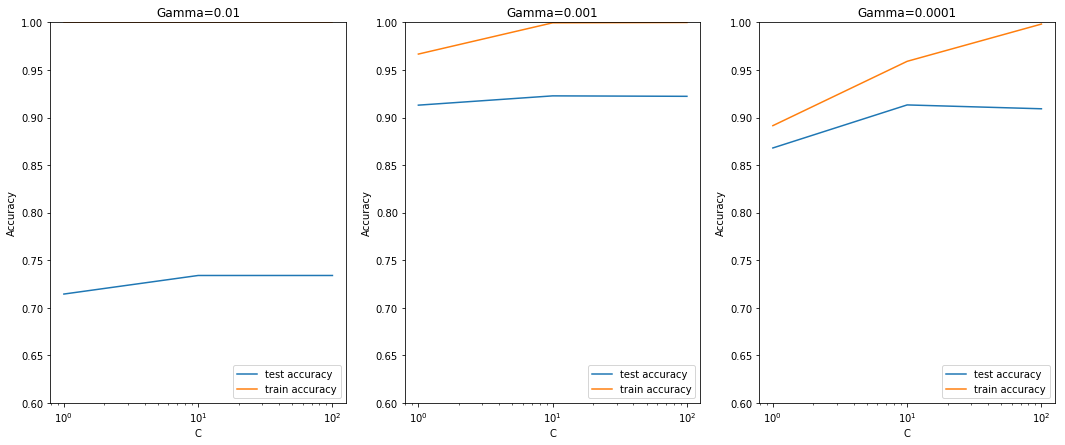

In [108]:
# First we need to convert 
results_cv['param_C'] = results_cv['param_C'].astype('int')

# # plotting
plt.figure(figsize=(18,7))

# subplot 1 of 3
plt.subplot(131)
gamma_01 = results_cv[results_cv['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2 of 3
plt.subplot(132)
gamma_001 = results_cv[results_cv['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3 of 3
plt.subplot(133)
gamma_0001 = results_cv[results_cv['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

#### Build the final model and see the performance on test data.

In [109]:
# optimal hyperparameters
best_of_C = 1
best_of_gamma = 0.001

# model
final_svm = svm.SVC(kernel='rbf', C=best_of_C, gamma=best_of_gamma)

# fit
final_svm.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [110]:
# predict
predictions = final_svm.predict(x_test)

In [111]:
# Confusion matrixz
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

confusion

[[3587    0   10   10    5   15   50   12   25    1]
 [   0 4108   14   16    5    3    6   18   10    5]
 [  24   23 3407   65   44    5   36  123   54    9]
 [   4   21   86 3502    5   89   11   73   76   33]
 [   3   11   36    7 3450   13   23   43    6  110]
 [  20   29   14  114   18 3020   79   53   36   35]
 [  31   12   11    1   14   34 3521   44   25    0]
 [   4   28   27    8   36    7    1 3739    7   97]
 [  14   59   32   80   22   97   25   44 3251   41]
 [  23   13   13   50   98    7    0  176   19 3379]]


In [113]:
# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

test_accuracy*100

92.497354497354507

### Conclusion
- The final accuracy on test data is approx. 92%.
- Since we have only used 10% of the data , this can be significantly increased by using 100% of training data